In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
#plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (12, 6)
os.chdir('/Users/Jonathan/citiBike_NYC')

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

2016-01-03 01:03:45 PM


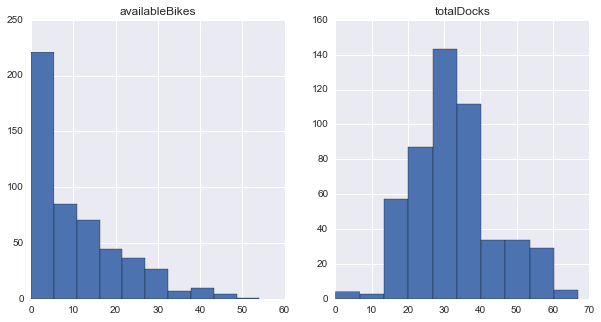

In [15]:
# Read Json using the requests package
import requests

url = 'https://www.citibikenyc.com/stations/json'
r = requests.get(url)
r.text
r.json()
r.json().keys()
print r.json()['executionTime']
r.json()['stationBeanList']
len(r.json()['stationBeanList']) # 507 docks
r.json()['stationBeanList'][0] # First key/station
from pandas.io.json import json_normalize
df = json_normalize(r.json()['stationBeanList']) # convert to DF

f,(ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df['availableBikes'])
ax1.set_title('availableBikes')
ax2.hist(df['totalDocks'])
ax2.set_title('totalDocks')

In [18]:
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,33,6,,72,,2016-01-03 01:03:07 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,23,9,,79,,2016-01-03 01:01:10 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,6,21,,82,,2016-01-03 01:00:39 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,30,32,,83,,2016-01-03 01:02:55 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,12,27,,116,,2016-01-03 01:01:38 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


In [8]:
df.shape
df.columns
df.statusValue.unique()  # array([u'In Service', u'Not In Service'], dtype=object)
len(df[df.statusValue=='Not In Service']) / float(len(df[df.statusValue=='In Service']))

0.013972055888223553

In [17]:
print df.availableBikes.sum()
print df.availableDocks.sum()

5462
10927
